# Linear SVM

https://www.kaggle.com/joniarroba/noshowappointments   

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import os, sys
import itertools
import numpy as np
import pandas as pd


In [37]:
datasource = "datasets/appointment_noshow.csv"

In [38]:
print(os.path.exists(datasource))

True


In [39]:
dataset = pd.read_csv(datasource)
del dataset["Unnamed: 0"]

In [40]:
dataset.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,9.145449e+14,5548703,F,2016-04-06T08:52:26Z,2016-05-02T00:00:00Z,26,SANTA TEREZA,0,0,0,0,0,1,No
1,9.536895e+13,5702942,M,2016-05-16T13:17:59Z,2016-05-31T00:00:00Z,4,TABUAZEIRO,0,0,0,0,0,0,No
2,4.887647e+12,5705960,F,2016-05-17T07:40:33Z,2016-05-18T00:00:00Z,1,NOVA PALESTINA,0,0,0,0,0,0,Yes
3,6.541438e+12,5681110,M,2016-05-10T13:35:24Z,2016-05-10T00:00:00Z,0,SÃO JOSÉ,0,0,0,0,0,0,No
4,6.296736e+12,5621693,F,2016-04-26T10:40:18Z,2016-04-29T00:00:00Z,20,MARUÍPE,0,0,0,0,0,1,No


In [41]:
dataset.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


## Preprocessing

We don't need PatientId and AppointmentId so let's remove it

In [42]:
deleteCols = ["PatientId", "AppointmentID"]

dataset.drop(deleteCols, axis = 1, inplace = True)

dataset.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-06T08:52:26Z,2016-05-02T00:00:00Z,26,SANTA TEREZA,0,0,0,0,0,1,No
1,M,2016-05-16T13:17:59Z,2016-05-31T00:00:00Z,4,TABUAZEIRO,0,0,0,0,0,0,No
2,F,2016-05-17T07:40:33Z,2016-05-18T00:00:00Z,1,NOVA PALESTINA,0,0,0,0,0,0,Yes
3,M,2016-05-10T13:35:24Z,2016-05-10T00:00:00Z,0,SÃO JOSÉ,0,0,0,0,0,0,No
4,F,2016-04-26T10:40:18Z,2016-04-29T00:00:00Z,20,MARUÍPE,0,0,0,0,0,1,No


Now, we need to convert Gender and No-show to binaries

In [43]:
dataset["Gender"] = dataset["Gender"].apply(["M", "F"].index)
dataset["No-show"] = dataset["No-show"].apply(["No", "Yes"].index)
#dataset["No-show"] = list(map(["No", "Yes"].index, dataset["No-show"]))

dataset.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,1,2016-04-06T08:52:26Z,2016-05-02T00:00:00Z,26,SANTA TEREZA,0,0,0,0,0,1,0
1,0,2016-05-16T13:17:59Z,2016-05-31T00:00:00Z,4,TABUAZEIRO,0,0,0,0,0,0,0
2,1,2016-05-17T07:40:33Z,2016-05-18T00:00:00Z,1,NOVA PALESTINA,0,0,0,0,0,0,1
3,0,2016-05-10T13:35:24Z,2016-05-10T00:00:00Z,0,SÃO JOSÉ,0,0,0,0,0,0,0
4,1,2016-04-26T10:40:18Z,2016-04-29T00:00:00Z,20,MARUÍPE,0,0,0,0,0,1,0


In [44]:
dataset["ScheduledDay"].dtype

dtype('O')

In [45]:
dataset["AppointmentDay"].dtype

dtype('O')

Both are in object = string format. We'd have to convert them to datetime

In [46]:
dataset["ScheduledDay"] = dataset["ScheduledDay"].apply(np.datetime64)
dataset["AppointmentDay"] = dataset["AppointmentDay"].apply(np.datetime64)

dataset.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,1,2016-04-06 08:52:26,2016-05-02,26,SANTA TEREZA,0,0,0,0,0,1,0
1,0,2016-05-16 13:17:59,2016-05-31,4,TABUAZEIRO,0,0,0,0,0,0,0
2,1,2016-05-17 07:40:33,2016-05-18,1,NOVA PALESTINA,0,0,0,0,0,0,1
3,0,2016-05-10 13:35:24,2016-05-10,0,SÃO JOSÉ,0,0,0,0,0,0,0
4,1,2016-04-26 10:40:18,2016-04-29,20,MARUÍPE,0,0,0,0,0,1,0


In [47]:
print("ScheduledDay", dataset["ScheduledDay"].dtype)
print("AppointmentDay", dataset["AppointmentDay"].dtype)

ScheduledDay datetime64[ns]
AppointmentDay datetime64[ns]


We'll add another column for the time difference between scheduledDay and AppointmentDay

In [48]:
dataset["AwaitingTime"] = (dataset["AppointmentDay"] - dataset["ScheduledDay"]).apply(lambda dt: dt.days)

In [49]:
dataset.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,AwaitingTime
0,1,2016-04-06 08:52:26,2016-05-02,26,SANTA TEREZA,0,0,0,0,0,1,0,25
1,0,2016-05-16 13:17:59,2016-05-31,4,TABUAZEIRO,0,0,0,0,0,0,0,14
2,1,2016-05-17 07:40:33,2016-05-18,1,NOVA PALESTINA,0,0,0,0,0,0,1,0
3,0,2016-05-10 13:35:24,2016-05-10,0,SÃO JOSÉ,0,0,0,0,0,0,0,-1
4,1,2016-04-26 10:40:18,2016-04-29,20,MARUÍPE,0,0,0,0,0,1,0,2


### Explore the values to see if there are any "bad" values

In [50]:
for column_name in set(dataset.columns) - {"ScheduledDay", "AppointmentDay"}:
    print(column_name, "\n ================================ \n", sorted(np.unique(dataset[column_name])))

Scholarship 
 [0, 1]
Alcoholism 
 [0, 1]
Neighbourhood 
 ['AEROPORTO', 'ANDORINHAS', 'ANTÔNIO HONÓRIO', 'ARIOVALDO FAVALESSA', 'BARRO VERMELHO', 'BELA VISTA', 'BENTO FERREIRA', 'BOA VISTA', 'BONFIM', 'CARATOÍRA', 'CENTRO', 'COMDUSA', 'CONQUISTA', 'CONSOLAÇÃO', 'CRUZAMENTO', 'DA PENHA', 'DE LOURDES', 'DO CABRAL', 'DO MOSCOSO', 'DO QUADRO', 'ENSEADA DO SUÁ', 'ESTRELINHA', 'FONTE GRANDE', 'FORTE SÃO JOÃO', 'FRADINHOS', 'GOIABEIRAS', 'GRANDE VITÓRIA', 'GURIGICA', 'HORTO', 'ILHA DAS CAIEIRAS', 'ILHA DE SANTA MARIA', 'ILHA DO BOI', 'ILHA DO FRADE', 'ILHA DO PRÍNCIPE', 'ILHAS OCEÂNICAS DE TRINDADE', 'INHANGUETÁ', 'ITARARÉ', 'JABOUR', 'JARDIM CAMBURI', 'JARDIM DA PENHA', 'JESUS DE NAZARETH', 'JOANA D´ARC', 'JUCUTUQUARA', 'MARIA ORTIZ', 'MARUÍPE', 'MATA DA PRAIA', 'MONTE BELO', 'MORADA DE CAMBURI', 'MÁRIO CYPRESTE', 'NAZARETH', 'NOVA PALESTINA', 'PARQUE INDUSTRIAL', 'PARQUE MOSCOSO', 'PIEDADE', 'PONTAL DE CAMBURI', 'PRAIA DO CANTO', 'PRAIA DO SUÁ', 'REDENÇÃO', 'REPÚBLICA', 'RESISTÊNCIA', 'ROMÃO

## Remove outliers

In [51]:
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest

Age cannot be less than 1 so let's remove those rows first

In [52]:
dataset = dataset[dataset["Age"] >= 1]
dataset = dataset.reset_index(drop = True)

print("Number of records", len(dataset))
print("Age", np.unique(dataset["Age"]))

Number of records 106987
Age [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 102 115]


Removing outliers for Awaiting Time with EllipticEnvelope

In [53]:
dataset["AwaitingTime"].head(10)

0    25
1    14
2     0
3     2
4    30
5    12
6    -1
7    20
8    -1
9     5
Name: AwaitingTime, dtype: int64

In [54]:
awaiting_time = np.array(dataset["AwaitingTime"]).reshape((-1, 1))
awaiting_time[:10]

array([[25],
       [14],
       [ 0],
       [ 2],
       [30],
       [12],
       [-1],
       [20],
       [-1],
       [ 5]], dtype=int64)

In [55]:
awaiting_time.shape

(106987, 1)

In [56]:
envelope = EllipticEnvelope(contamination = 0.003)
envelope.fit(awaiting_time)

EllipticEnvelope(assume_centered=False, contamination=0.003,
         random_state=None, store_precision=True, support_fraction=None)

In [57]:
outliers = envelope.predict(awaiting_time) == -1

In [58]:
dataset.drop(np.flatnonzero(outliers), inplace = True)
dataset.reset_index(drop = True, inplace = True)

In [60]:
outliers[0:10]

array([False, False, False, False, False, False, False, False, False, False], dtype=bool)

In [61]:
print({"inliers": np.sum(~ outliers), "outliers": np.sum(outliers)})

{'inliers': 106670, 'outliers': 317}


In [62]:
print("Number of records", len(dataset))

Number of records 106670


In [66]:
print("AwaitingTime: \n\n", np.unique(dataset["AwaitingTime"]))

AwaitingTime: 

 [-7 -2 -1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21
 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46
 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85]


## Encoding

Dealing with datetimes suck so let's create the day and month from the AppointmentDay column. We'll remove the ScheduledDay column because it can be derived from the 2 columns we'll create

In [67]:
dataset["AppointmentDate_day"] = dataset["AppointmentDay"].apply(lambda d: d.day)
dataset["AppointmentDate_month"] = dataset["AppointmentDay"].apply(lambda d: d.month)

In [68]:
colRemove = ["AppointmentDay", "ScheduledDay"]
dataset.drop(colRemove, inplace = True, axis = 1)

In [71]:
dataset.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,AwaitingTime,AppointmentDate_day,AppointmentDate_month
0,1,26,SANTA TEREZA,0,0,0,0,0,1,0,25,2,5
1,0,4,TABUAZEIRO,0,0,0,0,0,0,0,14,31,5
2,1,1,NOVA PALESTINA,0,0,0,0,0,0,1,0,18,5
3,1,20,MARUÍPE,0,0,0,0,0,1,0,2,29,4
4,1,6,CARATOÍRA,0,0,0,0,0,0,1,30,16,5


We'll create a one-hot encoding for the Neighborhood feature because we don't like to work with strings

In [72]:
from sklearn.preprocessing import LabelBinarizer

In [73]:
encoder = LabelBinarizer()

In [74]:
Neighbourhood_onehot = encoder.fit_transform(dataset["Neighbourhood"])

In [75]:
Neighbourhood_onehot

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [77]:
len(Neighbourhood_onehot[0])

81

In [78]:
encoder.classes_

array(['AEROPORTO', 'ANDORINHAS', 'ANTÔNIO HONÓRIO', 'ARIOVALDO FAVALESSA',
       'BARRO VERMELHO', 'BELA VISTA', 'BENTO FERREIRA', 'BOA VISTA',
       'BONFIM', 'CARATOÍRA', 'CENTRO', 'COMDUSA', 'CONQUISTA',
       'CONSOLAÇÃO', 'CRUZAMENTO', 'DA PENHA', 'DE LOURDES', 'DO CABRAL',
       'DO MOSCOSO', 'DO QUADRO', 'ENSEADA DO SUÁ', 'ESTRELINHA',
       'FONTE GRANDE', 'FORTE SÃO JOÃO', 'FRADINHOS', 'GOIABEIRAS',
       'GRANDE VITÓRIA', 'GURIGICA', 'HORTO', 'ILHA DAS CAIEIRAS',
       'ILHA DE SANTA MARIA', 'ILHA DO BOI', 'ILHA DO FRADE',
       'ILHA DO PRÍNCIPE', 'ILHAS OCEÂNICAS DE TRINDADE', 'INHANGUETÁ',
       'ITARARÉ', 'JABOUR', 'JARDIM CAMBURI', 'JARDIM DA PENHA',
       'JESUS DE NAZARETH', 'JOANA D´ARC', 'JUCUTUQUARA', 'MARIA ORTIZ',
       'MARUÍPE', 'MATA DA PRAIA', 'MONTE BELO', 'MORADA DE CAMBURI',
       'MÁRIO CYPRESTE', 'NAZARETH', 'NOVA PALESTINA', 'PARQUE INDUSTRIAL',
       'PARQUE MOSCOSO', 'PIEDADE', 'PONTAL DE CAMBURI', 'PRAIA DO CANTO',
       'PRAIA DO SUÁ',

In [79]:
len(encoder.classes_)

81

In [80]:
for j, neighborhood in enumerate(encoder.classes_):
    dataset["Neighborhood ({})".format(neighborhood)] = Neighbourhood_onehot[:, j]

In [84]:
dataset.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,...,Neighborhood (SANTOS REIS),Neighborhood (SEGURANÇA DO LAR),Neighborhood (SOLON BORGES),Neighborhood (SÃO BENEDITO),Neighborhood (SÃO CRISTÓVÃO),Neighborhood (SÃO JOSÉ),Neighborhood (SÃO PEDRO),Neighborhood (TABUAZEIRO),Neighborhood (UNIVERSITÁRIO),Neighborhood (VILA RUBIM)
0,1,26,SANTA TEREZA,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,4,TABUAZEIRO,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,1,NOVA PALESTINA,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,20,MARUÍPE,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,6,CARATOÍRA,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [85]:
del dataset["Neighbourhood"]

In [86]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106670 entries, 0 to 106669
Data columns (total 93 columns):
Gender                                        106670 non-null int64
Age                                           106670 non-null int64
Scholarship                                   106670 non-null int64
Hipertension                                  106670 non-null int64
Diabetes                                      106670 non-null int64
Alcoholism                                    106670 non-null int64
Handcap                                       106670 non-null int64
SMS_received                                  106670 non-null int64
No-show                                       106670 non-null int64
AwaitingTime                                  106670 non-null int64
AppointmentDate_day                           106670 non-null int64
AppointmentDate_month                         106670 non-null int64
Neighborhood (AEROPORTO)                      106670 non-null int32
Neigh

## Statistics

Let's check the statistics on the features

In [88]:
dataset.loc[:, [column_name for column_name in dataset.columns
                   if not column_name.startswith("Neighborhood")]].describe()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,AwaitingTime,AppointmentDate_day,AppointmentDate_month
count,106670.000000,106670.000000,106670.000000,106670.000000,106670.000000,106670.000000,106670.000000,106670.000000,106670.000000,106670.000000,106670.000000,106670.000000
mean,0.655161,38.248317,0.101191,0.203019,0.074088,0.031452,0.022874,0.322162,0.202447,8.867067,12.469195,5.211278
std,0.475318,22.428750,0.301582,0.402248,0.261916,0.174537,0.163863,0.467307,0.401825,14.165951,9.046689,0.473975
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.000000,1.000000,4.000000
25%,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,5.000000,5.000000
50%,1.000000,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,10.000000,5.000000
75%,1.000000,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,13.000000,19.000000,5.000000
max,1.000000,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,85.000000,31.000000,6.000000


We'll have to check the class balance. This dataset is used to predict No-show from the factors encoded. No-shows are a miniority so this dataset is very imbalanced. We want to understand how balanced it is between the number of positive and negative samples

In [90]:
num_noshow = np.sum(dataset["No-show"])
num_noshow

21595

In [91]:
print("no-show ratio:", num_noshow, "/", len(dataset), "=", num_noshow/len(dataset))

no-show ratio: 21595 / 106670 = 0.2024467985375457


The dataset is pretty much divided 80:20 for show:no-show. We'll have to resample the no-shows for the sake of fairness. 

In [92]:
upsample_rate = (len(dataset) - num_noshow) / num_noshow
print("upsample_rate:", upsample_rate)

upsample_rate: 3.9395693447557303


In [93]:
print(int(num_noshow * upsample_rate), len(dataset) - num_noshow)

85075 85075


In [101]:
dataset_resampled = pd.concat([
    dataset[dataset["No-show"] == 1].sample(frac = upsample_rate, replace = True).reset_index(drop = True),
    dataset[dataset["No-show"] == 0]
])

dataset_resampled = dataset_resampled.sample(frac = 1).reset_index(drop = True) # shuffle

In [102]:
dataset_resampled.shape

(170150, 93)

In [104]:
85075 * 2

170150

In [105]:
# verifying the balance rate:

print('noshow ratio:', np.sum(dataset_resampled['No-show'] == 1) / len(dataset_resampled))

noshow ratio: 0.5


In [107]:
# replace dataset_resampled with dataset

dataset = dataset_resampled
del dataset_resampled

## PCA on the neighborhood columns

Let's try to compress these columns down a bit

In [109]:
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.preprocessing import scale, LabelEncoder, OneHotEncoder, LabelBinarizer
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif

In [112]:
# selecting all the neighborhood columns

X_neighbors = np.array(dataset.loc[:, [column_name for column_name in dataset.columns
                                      if column_name.startswith("Neighborhood")]])

In [113]:
X_neighbors.shape

(170150, 81)

In [114]:
X_neighbors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

Applying PCA to X_neighbors with 60 principal components

In [115]:
pca = PCA(n_components = 60)
X_neighbors_PCA = pca.fit_transform(X_neighbors[:, :60])

In [116]:
X_neighbors_PCA.shape

(170150, 60)

In [117]:
np.sum(pca.explained_variance_ratio_)

1.0000000000000002

In [125]:
dataset.shape

(170150, 93)

Let's delete all the original Neighborhood columns and replace them with the 60 PCs. 

In [122]:
c = np.array([column_name for column_name in dataset.columns
                 if column_name.startswith("Neighborhood")])

In [123]:
c.shape

(81,)

In [124]:
c

array(['Neighborhood (AEROPORTO)', 'Neighborhood (ANDORINHAS)',
       'Neighborhood (ANTÔNIO HONÓRIO)',
       'Neighborhood (ARIOVALDO FAVALESSA)',
       'Neighborhood (BARRO VERMELHO)', 'Neighborhood (BELA VISTA)',
       'Neighborhood (BENTO FERREIRA)', 'Neighborhood (BOA VISTA)',
       'Neighborhood (BONFIM)', 'Neighborhood (CARATOÍRA)',
       'Neighborhood (CENTRO)', 'Neighborhood (COMDUSA)',
       'Neighborhood (CONQUISTA)', 'Neighborhood (CONSOLAÇÃO)',
       'Neighborhood (CRUZAMENTO)', 'Neighborhood (DA PENHA)',
       'Neighborhood (DE LOURDES)', 'Neighborhood (DO CABRAL)',
       'Neighborhood (DO MOSCOSO)', 'Neighborhood (DO QUADRO)',
       'Neighborhood (ENSEADA DO SUÁ)', 'Neighborhood (ESTRELINHA)',
       'Neighborhood (FONTE GRANDE)', 'Neighborhood (FORTE SÃO JOÃO)',
       'Neighborhood (FRADINHOS)', 'Neighborhood (GOIABEIRAS)',
       'Neighborhood (GRANDE VITÓRIA)', 'Neighborhood (GURIGICA)',
       'Neighborhood (HORTO)', 'Neighborhood (ILHA DAS CAIEIRAS)',
  

In [126]:
dataset.drop(c, axis = 1, inplace = True)

In [127]:
print(dataset.shape)

(170150, 12)


Now, we still have to add the PC to the dataset

In [128]:
for j in range(X_neighbors_PCA.shape[1]):
    dataset["N{}".format(j)] = X_neighbors_PCA[:, j]

In [129]:
dataset.shape

(170150, 72)

In [130]:
dataset.head()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,AwaitingTime,...,N50,N51,N52,N53,N54,N55,N56,N57,N58,N59
0,1,7,0,0,0,0,0,0,1,6,...,0.007920,0.001866,0.001243,0.000357,0.000173,0.000026,0.000005,1.154041e-06,9.130991e-07,1.405271e-08
1,1,51,0,1,0,0,0,0,0,21,...,0.001581,0.000394,0.000269,0.000081,0.000040,0.000006,0.000001,2.774949e-07,2.196602e-07,3.391468e-09
2,0,20,0,0,0,0,0,0,1,28,...,0.231071,0.018403,0.009823,0.002038,0.000888,0.000114,0.000020,4.820661e-06,3.806874e-06,5.781486e-08
3,1,37,1,0,0,1,0,1,1,13,...,0.005577,0.001342,0.000901,0.000263,0.000128,0.000019,0.000004,8.671078e-07,6.861752e-07,1.057141e-08
4,0,34,0,0,0,0,0,0,1,12,...,0.003902,0.000953,0.000644,0.000190,0.000093,0.000014,0.000003,6.372721e-07,5.043584e-07,7.776832e-09


In [131]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170150 entries, 0 to 170149
Data columns (total 72 columns):
Gender                   170150 non-null int64
Age                      170150 non-null int64
Scholarship              170150 non-null int64
Hipertension             170150 non-null int64
Diabetes                 170150 non-null int64
Alcoholism               170150 non-null int64
Handcap                  170150 non-null int64
SMS_received             170150 non-null int64
No-show                  170150 non-null int64
AwaitingTime             170150 non-null int64
AppointmentDate_day      170150 non-null int64
AppointmentDate_month    170150 non-null int64
N0                       170150 non-null float64
N1                       170150 non-null float64
N2                       170150 non-null float64
N3                       170150 non-null float64
N4                       170150 non-null float64
N5                       170150 non-null float64
N6                       170150

## Feature selection

In [133]:
column_names = np.array(dataset.columns)
original_features = column_names != "No-show"

In [134]:
column_names

array(['Gender', 'Age', 'Scholarship', 'Hipertension', 'Diabetes',
       'Alcoholism', 'Handcap', 'SMS_received', 'No-show', 'AwaitingTime',
       'AppointmentDate_day', 'AppointmentDate_month', 'N0', 'N1', 'N2',
       'N3', 'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10', 'N11', 'N12',
       'N13', 'N14', 'N15', 'N16', 'N17', 'N18', 'N19', 'N20', 'N21',
       'N22', 'N23', 'N24', 'N25', 'N26', 'N27', 'N28', 'N29', 'N30',
       'N31', 'N32', 'N33', 'N34', 'N35', 'N36', 'N37', 'N38', 'N39',
       'N40', 'N41', 'N42', 'N43', 'N44', 'N45', 'N46', 'N47', 'N48',
       'N49', 'N50', 'N51', 'N52', 'N53', 'N54', 'N55', 'N56', 'N57',
       'N58', 'N59'], dtype=object)

In [136]:
original_features

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True], dtype=bool)

In [139]:
cols = dataset.loc[:, original_features].columns
cols

Index(['Gender', 'Age', 'Scholarship', 'Hipertension', 'Diabetes',
       'Alcoholism', 'Handcap', 'SMS_received', 'AwaitingTime',
       'AppointmentDate_day', 'AppointmentDate_month', 'N0', 'N1', 'N2', 'N3',
       'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10', 'N11', 'N12', 'N13', 'N14',
       'N15', 'N16', 'N17', 'N18', 'N19', 'N20', 'N21', 'N22', 'N23', 'N24',
       'N25', 'N26', 'N27', 'N28', 'N29', 'N30', 'N31', 'N32', 'N33', 'N34',
       'N35', 'N36', 'N37', 'N38', 'N39', 'N40', 'N41', 'N42', 'N43', 'N44',
       'N45', 'N46', 'N47', 'N48', 'N49', 'N50', 'N51', 'N52', 'N53', 'N54',
       'N55', 'N56', 'N57', 'N58', 'N59'],
      dtype='object')

In [141]:
featureData = dataset.loc[:, original_features]
featureData.head()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,AwaitingTime,AppointmentDate_day,...,N50,N51,N52,N53,N54,N55,N56,N57,N58,N59
0,1,7,0,0,0,0,0,0,6,18,...,0.007920,0.001866,0.001243,0.000357,0.000173,0.000026,0.000005,1.154041e-06,9.130991e-07,1.405271e-08
1,1,51,0,1,0,0,0,0,21,19,...,0.001581,0.000394,0.000269,0.000081,0.000040,0.000006,0.000001,2.774949e-07,2.196602e-07,3.391468e-09
2,0,20,0,0,0,0,0,0,28,18,...,0.231071,0.018403,0.009823,0.002038,0.000888,0.000114,0.000020,4.820661e-06,3.806874e-06,5.781486e-08
3,1,37,1,0,0,1,0,1,13,12,...,0.005577,0.001342,0.000901,0.000263,0.000128,0.000019,0.000004,8.671078e-07,6.861752e-07,1.057141e-08
4,0,34,0,0,0,0,0,0,12,19,...,0.003902,0.000953,0.000644,0.000190,0.000093,0.000014,0.000003,6.372721e-07,5.043584e-07,7.776832e-09


Create train/test splits

In [142]:
from sklearn.model_selection import train_test_split

X = scale(np.array(featureData))
y = np.array(dataset["No-show"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

Let's fit a feature selector

In [143]:
selector = SelectKBest(f_classif, k = 20)
selector.fit(X_train, y_train)

SelectKBest(k=20, score_func=<function f_classif at 0x00000211B6161AE8>)

In [144]:
selector.get_support()

array([False,  True,  True,  True,  True, False, False,  True,  True,
       False,  True,  True, False, False,  True,  True, False,  True,
        True,  True,  True,  True, False, False,  True, False,  True,
       False, False, False,  True, False,  True, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False], dtype=bool)

In [147]:
selected_features = column_names[original_features][selector.get_support()]
print(selected_features)

['Age' 'Scholarship' 'Hipertension' 'Diabetes' 'SMS_received'
 'AwaitingTime' 'AppointmentDate_month' 'N0' 'N3' 'N4' 'N6' 'N7' 'N8' 'N9'
 'N10' 'N13' 'N15' 'N19' 'N21' 'N30']


## Create a linear SVM classifier

In [148]:
import tensorflow as tf

tf.logging.set_verbosity(tf.logging.ERROR)
import tf_threads
estimator_config = tf.contrib.learn.RunConfig(session_config = tf_threads.limit(tf, 4))

In [150]:
# prepare feature columns as tf placeholders

feature_columns = [tf.contrib.layers.real_valued_column(selected_feature)
                      for selected_feature in selected_features]

feature_columns

[_RealValuedColumn(column_name='Age', dimension=1, default_value=None, dtype=tf.float32, normalizer=None),
 _RealValuedColumn(column_name='Scholarship', dimension=1, default_value=None, dtype=tf.float32, normalizer=None),
 _RealValuedColumn(column_name='Hipertension', dimension=1, default_value=None, dtype=tf.float32, normalizer=None),
 _RealValuedColumn(column_name='Diabetes', dimension=1, default_value=None, dtype=tf.float32, normalizer=None),
 _RealValuedColumn(column_name='SMS_received', dimension=1, default_value=None, dtype=tf.float32, normalizer=None),
 _RealValuedColumn(column_name='AwaitingTime', dimension=1, default_value=None, dtype=tf.float32, normalizer=None),
 _RealValuedColumn(column_name='AppointmentDate_month', dimension=1, default_value=None, dtype=tf.float32, normalizer=None),
 _RealValuedColumn(column_name='N0', dimension=1, default_value=None, dtype=tf.float32, normalizer=None),
 _RealValuedColumn(column_name='N3', dimension=1, default_value=None, dtype=tf.float32,

In [151]:
# create an SVM classifier

classifier = tf.contrib.learn.SVM("example_id", 
                                     feature_columns = feature_columns, 
                                     l2_regularization = 1.0)

In [152]:
# prepare input_fn() to supply training data

def input_fn():
    X_selected = selector.transform(X_train) # select features based on the feature selection method
    
    columns = {
        feature_name: tf.constant(np.expand_dims(X_selected[:, i], 1))
            for i, feature_name in enumerate(selected_features)
    }
    
    columns["example_id"] = tf.constant([str(i + 1) for i in range(len(X_selected))])
    labels = tf.constant(y_train)
    return columns, labels

## Train the SVM

In [153]:
%%time

classifier.fit(input_fn = input_fn, steps = 30)

Wall time: 1min 5s


SVM(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._BinarySvmHead object at 0x0000021183780550>, 'feature_columns': [_RealValuedColumn(column_name='Age', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='Scholarship', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='Hipertension', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='Diabetes', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='SMS_received', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='AwaitingTime', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='AppointmentDate_month', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='N0', dimension=1, default_va

## Evaluation

In [154]:
def predict_fn():
    X_selected = selector.transform(X_test)
    
    columns = {
        feature_name: tf.constant(np.expand_dims(X_selected[:, i], 1))
            for i, feature_name in enumerate(selected_features)
    }
    
    columns["example_id"] = tf.constant([str(i + 1) for i in range(len(X_selected))])
    return columns

Let's make a prediction now

In [155]:
y_pred = classifier.predict(input_fn = predict_fn)
y_pred = list(map(lambda i: i["classes"], y_pred))
print(y_pred[0:20])

[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1]


In [156]:
from sklearn.metrics import accuracy_score, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.601792535998


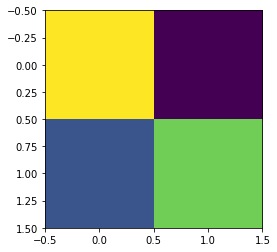

In [157]:
plt.imshow(confusion_matrix(y_test, y_pred))